## GEOS-518 Applied Hydrologic Modeling

### Autocorrelation of 30 years of modeled water vapor data in Boise, ID

### 02/07/18

###  Charles Becker

> ##### Load packages and data

In [111]:
import numpy as np
import xarray as xr # used to help convert NetCDF data to dataframe structure
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller # Used for ADF Test

a = xr.open_dataset('30_year_point_Q2.nc')

data = a.to_dataframe()  # create dataframe
Q2 = data['Q2'].values   # pull water vapor values

> ##### Plot time series

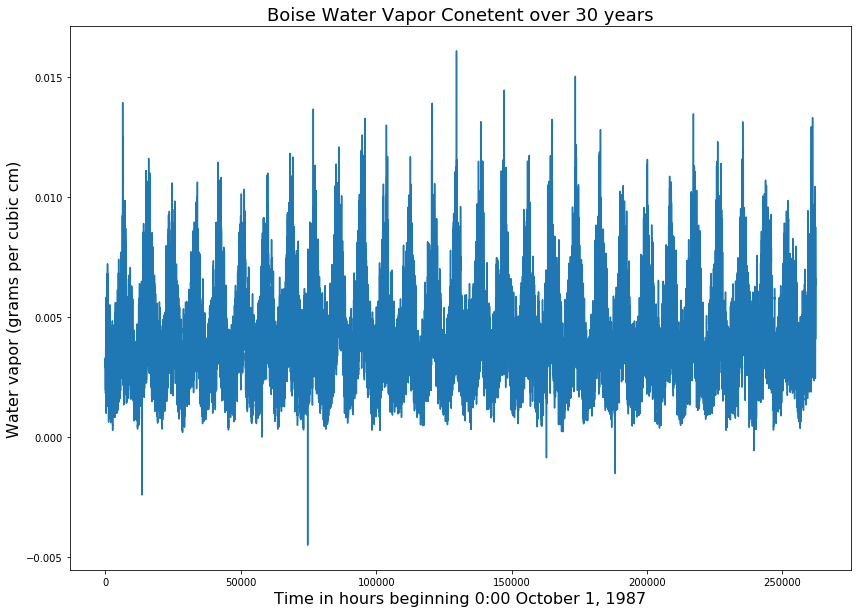

In [112]:
# Plot and label Q2 data
plt.figure(figsize=(14,10))
plt.title('Boise Water Vapor Conetent over 30 years',fontsize=18)
plt.ylabel('Water vapor (grams per cubic cm)', fontsize=16)
plt.xlabel('Time in hours beginning 0:00 October 1, 1987', fontsize=16)
plt.plot(Q2)
plt.show()

> ##### Plot basic statistics and histogram

The mean water vapor in Boise from 1987 - 2017 is: 0.00385038
The variance of water vapor in Boise from 1987 - 2017 is: 2.9076e-06
The standard deviation of water vapor in Boise from 1987 - 2017 is: 0.00170517


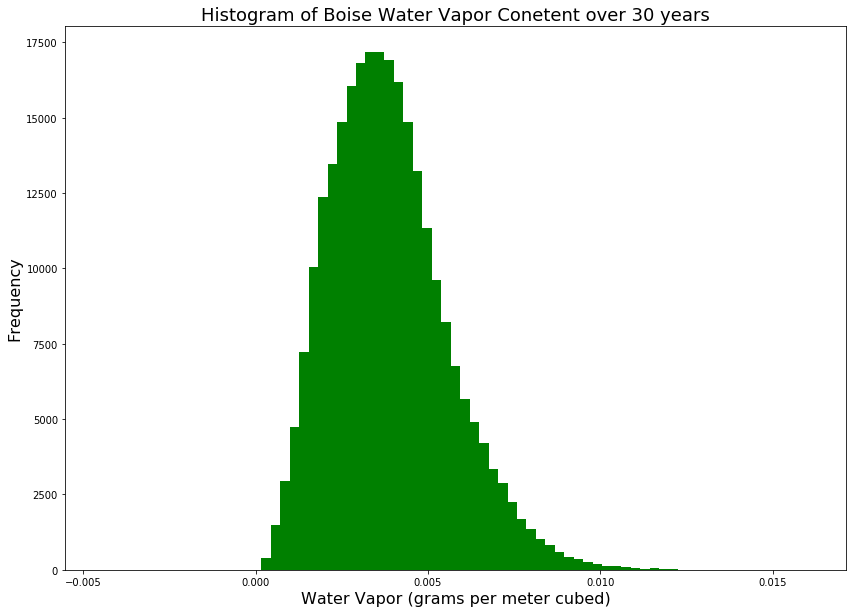

In [46]:
# Calculate and print mean, variance and standard deviation
print('The mean water vapor in Boise from 1987 - 2017 is:', np.mean(bb))
print('The variance of water vapor in Boise from 1987 - 2017 is:', np.var(bb))
print('The standard deviation of water vapor in Boise from 1987 - 2017 is:', np.std(bb))

# Create and plot histogram fo Q2 with 75 bins
plt.figure(figsize=(14,10))
plt.hist(bb, bins=75, color = 'green')
plt.title('Histogram of Boise Water Vapor Conetent over 30 years',fontsize=18)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Water Vapor (grams per meter cubed)', fontsize=16)
plt.show()

> ##### Test for stationarity via Augmented Dickey-Fuller test

In [113]:
ADF = adfuller(Q2) # Use ADF Test to assess stationarity
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])
print('Critical Values:')
for key, value in ADF_result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -25.798861
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


> ##### Plot auto correlation and respective correlation coefficients at lags of 1 and 24 hours

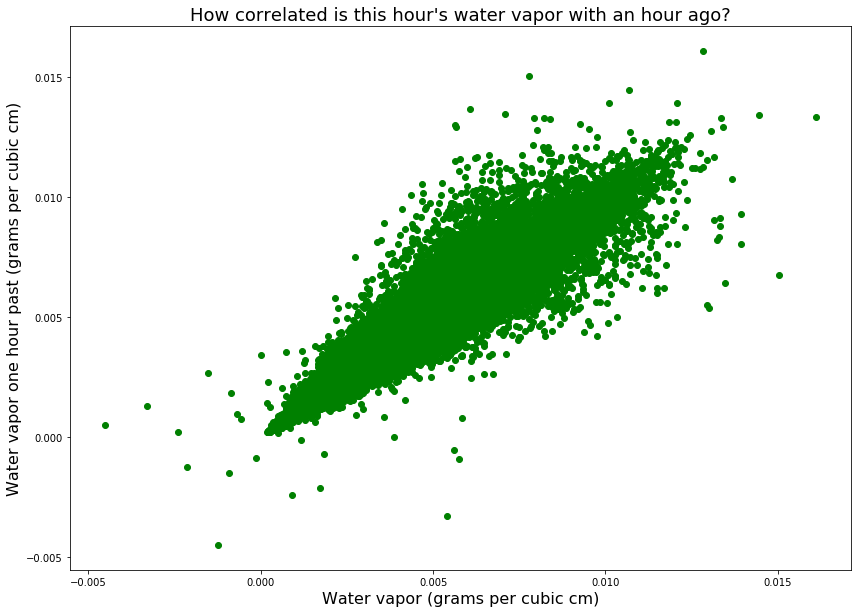

The correlation coefficient of values lagged by 1 hour is: 0.977537428192


In [131]:
# Create arrays of Q2 lagged by 1 timestep
q = Q2[0:-2]
q1 = Q2[1:-1]

# Create scatter plot of lagged values
plt.figure(figsize=(14,10))
plt.plot(q,q1,'o',color="green")
plt.title('How correlated is this hour\'s water vapor with an hour ago?',fontsize=18)
plt.xlabel('Water vapor (grams per cubic cm)', fontsize=16)
plt.ylabel('Water vapor one hour past (grams per cubic cm)', fontsize=16)
plt.show()

# Calculate correlation coefficient (R-value)
R = np.corrcoef(q,q1)
print('The correlation coefficient of values lagged by 1 hour is:',R[1,0])

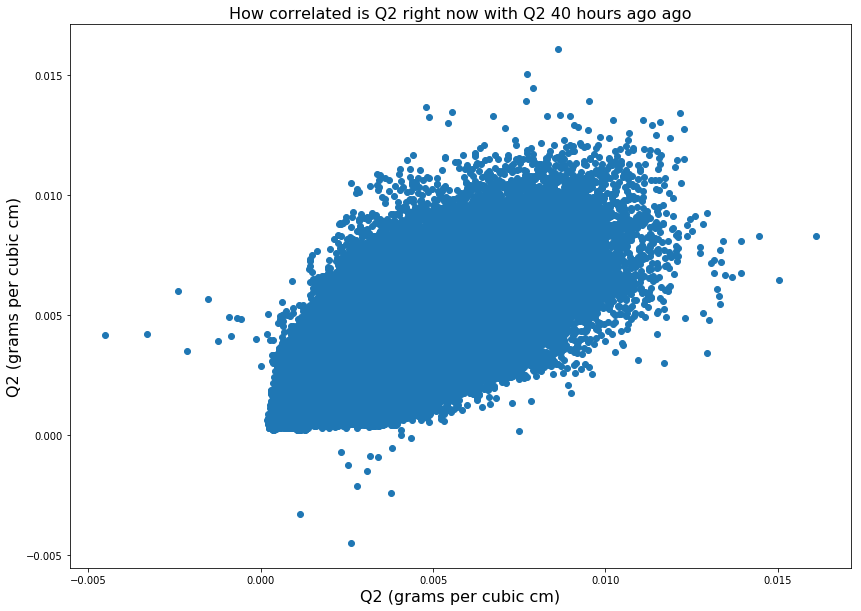

The correlation coefficient of values lagged by 24 hours is: 0.721300232226


In [130]:
# Create arrays of Q2 lagged by 1 timestep
q0 = Q2[24:-1] 
q24 = Q2[0:-(25)]

# Create scatter plot of lagged values
plt.figure(figsize=(14,10))
plt.plot(q0,q40,'o')
plt.title('How correlated is Q2 right now with Q2 40 hours ago ago',fontsize=16)
plt.xlabel('Q2 (grams per cubic cm)',fontsize=16)
plt.ylabel('Q2 (grams per cubic cm)',fontsize=16)
plt.show()

# Calculate correlation coefficient (R-value)
R = np.corrcoef(q0,q40)
print('The correlation coefficient of values lagged by 24 hours is:',R[1,0])

> ##### Create and plot autocorrelation function for 72 hours 

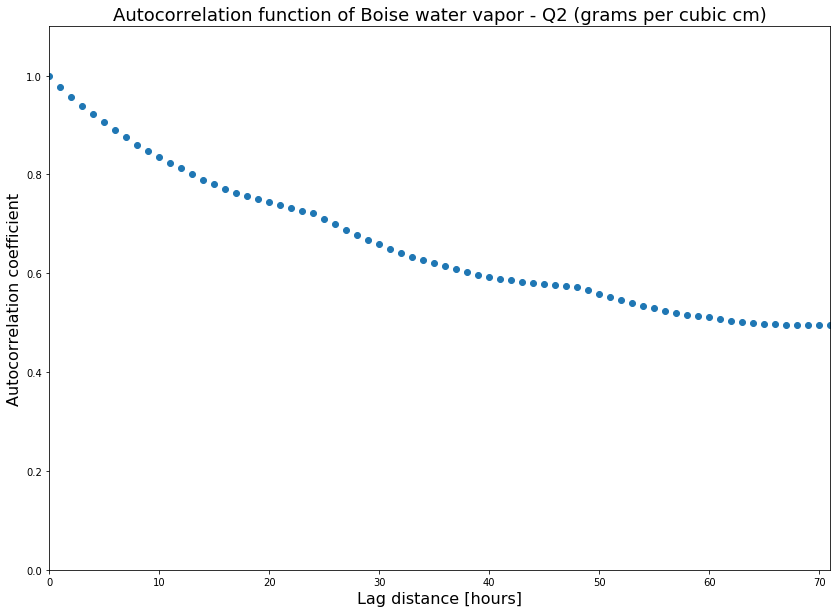

In [140]:
# Create sequences for looping through Q2 array
Nk = 72
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

# Loop to create correlation coefficients for each lag from 1 - Nk
for k in K:
    q =Q2[k:-1] 
    q1 = Q2[0:-(1+k)]
    R = np.corrcoef(q,q1)
    Rk[k] = R[1,0]

# Plot Autocorrelation funciton    
plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Boise water vapor - Q2 (grams per cubic cm)',fontsize=18)
plt.xlabel('Lag distance [hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient',fontsize=16)
plt.show()

> ##### Create and plot autocorrelation function over 3 years

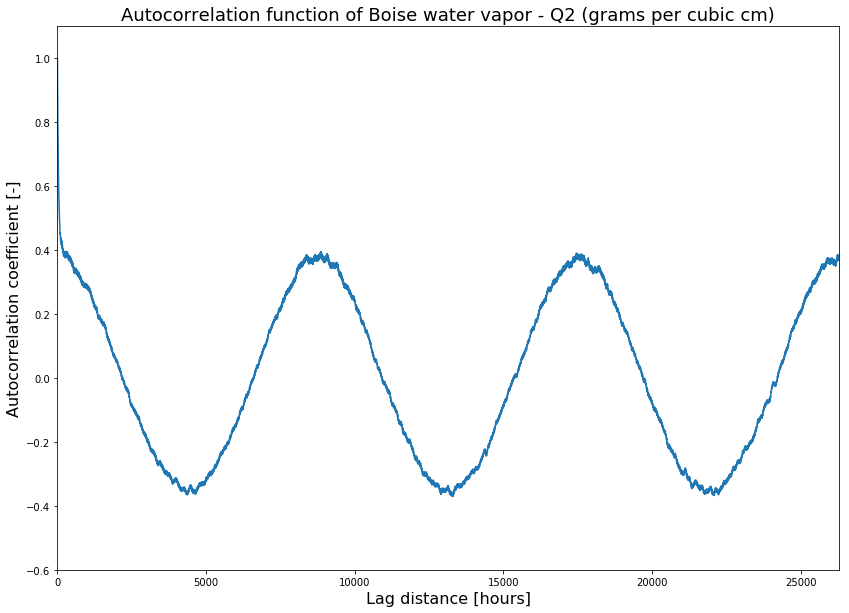

In [139]:
# Create sequences for looping through Q2 array
Nk = 24*365*3
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

# Loop to create correlation coefficients for each lag from 1 - Nk
for k in K:
    q =Q2[k:-1] 
    q1 = Q2[0:-(1+k)]
    R = np.corrcoef(q,q1)
    Rk[k] = R[1,0]
  
    
# Plot Autocorrelation funciton    
plt.figure(figsize=(14,10))
plt.plot(K,Rk)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(-.6,1.1)
plt.title('Autocorrelation function of Boise water vapor - Q2 (grams per cubic cm)',fontsize=18)
plt.xlabel('Lag distance [hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

> ##### Brief discussion

Modeled water vapor data was taken from Boise, ID at hourly intervals for 30 years.  The overall distribution is reasonably normal although skewed a bit to the right.  There does not appear to be any long term trend in the data based upon a visual inspection of the time series.  This is confirmed as a stationary series with the ADF test having a large negative test statistic and a 0 p-vlaue.  There were far too many data points (~300k) to run an autocorrelation through the entire dataset, but the general seasonal pattern is depicted in the 3-year autocorrelation funciton.  If we were to run the entire 30 years, I suspect we may see a very slight decay in the auto correlation as climate change has brought higher temperatures which results in higher atmospheric water vapor.  